In [18]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pystan
%matplotlib inline 

counts = [
    703, 1478, 1430, 1109,
    58, 1756, 1630, 1568,
    63, 1453, 2068, 2483,
    61, 749, 1183, 3315]

In [17]:
# Unifrm Dirchlet prior 
al_0 = np.ones(16)
dirichlet_0 = stats.dirichlet(al_0)

als_post = []
dirs_post = []

al_post = al_0 + counts
stats.dirichlet(al_post)
    
print (al_post)

[ 704. 1479. 1431. 1110.   59. 1757. 1631. 1569.   64. 1454. 2069. 2484.
   62.  750. 1184. 3316.]


In [20]:
import pandas as pd
df = pd.read_csv("https://gist.githubusercontent.com/cscheffler/482412b75d7b7c8ab83dd86e81d71403/raw/9ed65a9d2bb8455e4b225400f57f2d77f851aec9/socialmobility.csv")
df

,father,son,count
0,farm,farm,703
1,farm,unskilled,1478
2,farm,skilled,1430
3,farm,professional,1109
4,unskilled,farm,58
5,unskilled,unskilled,1756
6,unskilled,skilled,1630
7,unskilled,professional,1568
8,skilled,farm,63
9,skilled,unskilled,1453


[0.31225787 0.33812117]


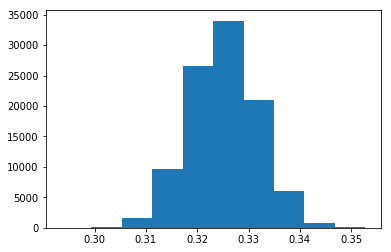

In [26]:
# sample 

dist = stats.dirichlet(al_post)
samples = dist.rvs(size=100000)

prob__son = [i[6]/sum(i[4:8])for i in samples]
plt.hist(prob__son)

#What is the posterior 95% probability interval over the probability that a son will
#become a skilled laborer if his father was an unskilled laborer?

lst = [2.5,97.5]
print (np.percentile(prob__son, lst))

[0.22287242 0.24715408]


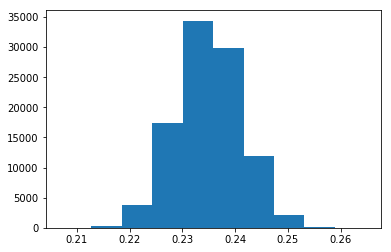

In [25]:
prob__son_2 = [i[3]/sum(i[0:4])for i in samples]
plt.hist(prob__son_2)

lst = [2.5,97.5]
print (np.percentile(prob__son_2, lst))

# What is the posterior 95% probability interval over the probability that a father
#works on a farm if his son works as a professional?